<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">ML-3 GA_ExamPaper_40 Marks </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from surprise import KNNWithMeans,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split,cross_validate





### We combined two datasets in single CSV file. Use the below script to seperate the data.
#### Use data_dime for dimensionality reduction and data_recom for recommendation system.



In [2]:
data=pd.read_csv('data_set.csv')

data_dime=data.iloc[0:955,0:24]

data_recom=data.iloc[:,24:28]


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section A - 5 Marks </h1>

### 1. Data Preprocessing

### 1.a. Read the dataset and perform required cleaning and preprocessing prior to model building. Justify the pre-processing approaches used. (3 Marks)

In [25]:
import pandas as pd
data=pd.read_csv('data_set.csv')
data_dime=data.iloc[0:955,0:24]
data_recom = data.iloc[:, 24:28]

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_recom.shape

(85724, 4)

In [6]:
data_dime.shape

(955, 24)

In [7]:
data_recom.head()

,UserID,ItemID,Rating,Timestamp
0,905,470,1,889325071
1,697,1518,5,879835275
2,855,1687,5,875638677
3,950,1447,5,877420720
4,806,1170,4,879889337


In [8]:
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Type,UserID,ItemID,Rating,Timestamp
0,61.8750,12.00,32.077140,0.755673,449.71875,1.345392,1.000000,0.758333,2.339759,14.650000,...,276.318695,65971.18750,15752872.0,368197.28130,19.111872,Non-Infectious,905,470,1,889325071
1,14.0625,7.50,16.749615,0.629887,56.30625,1.615692,0.900000,0.693333,2.105107,7.850000,...,318.816223,99969.98438,31347990.0,13273.56641,19.048378,Non-Infectious,697,1518,5,879835275
2,11.8125,15.75,13.560380,0.807250,127.96875,1.574249,0.333333,0.333333,3.415881,11.400000,...,275.847107,91334.75781,30241724.0,11021.21387,19.080124,Non-Infectious,855,1687,5,875638677
3,20.2500,9.75,21.604931,0.545166,258.86250,1.529404,0.923077,0.494505,3.196538,15.316667,...,245.214554,48072.80469,9425374.0,22393.75195,19.111872,Non-Infectious,950,1447,5,877420720
4,13.5000,11.25,15.744046,0.684401,127.23750,1.334365,0.866667,0.693333,3.898952,13.400000,...,252.875107,79794.33594,25179706.0,13486.62402,19.080124,Non-Infectious,806,1170,4,879889337


In [11]:
data_dime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   955 non-null    float64
 1   Feature_2   955 non-null    float64
 2   Feature_3   955 non-null    float64
 3   Feature_4   955 non-null    float64
 4   Feature_5   955 non-null    float64
 5   Feature_6   955 non-null    float64
 6   Feature_7   955 non-null    float64
 7   Feature_8   955 non-null    float64
 8   Feature_9   955 non-null    float64
 9   Feature_10  955 non-null    float64
 10  Feature_11  955 non-null    float64
 11  Feature_12  955 non-null    float64
 12  Feature_13  955 non-null    float64
 13  Feature_14  955 non-null    float64
 14  Feature_15  955 non-null    float64
 15  Feature_16  955 non-null    float64
 16  Feature_17  955 non-null    float64
 17  Feature_18  955 non-null    float64
 18  Feature_19  955 non-null    float64
 19  Feature_20  955 non-null    f

### 1.b. Keep the input features of data_dime (independent variables) in inp_data_dime and output feature(`Type`) in out.

In [10]:
inp_data_dime = data_dime.drop(columns=["Type"])
out_data_dime = data_dime.Type

### 1.c. Perform univariate and bivariate analysis (2 Marks)

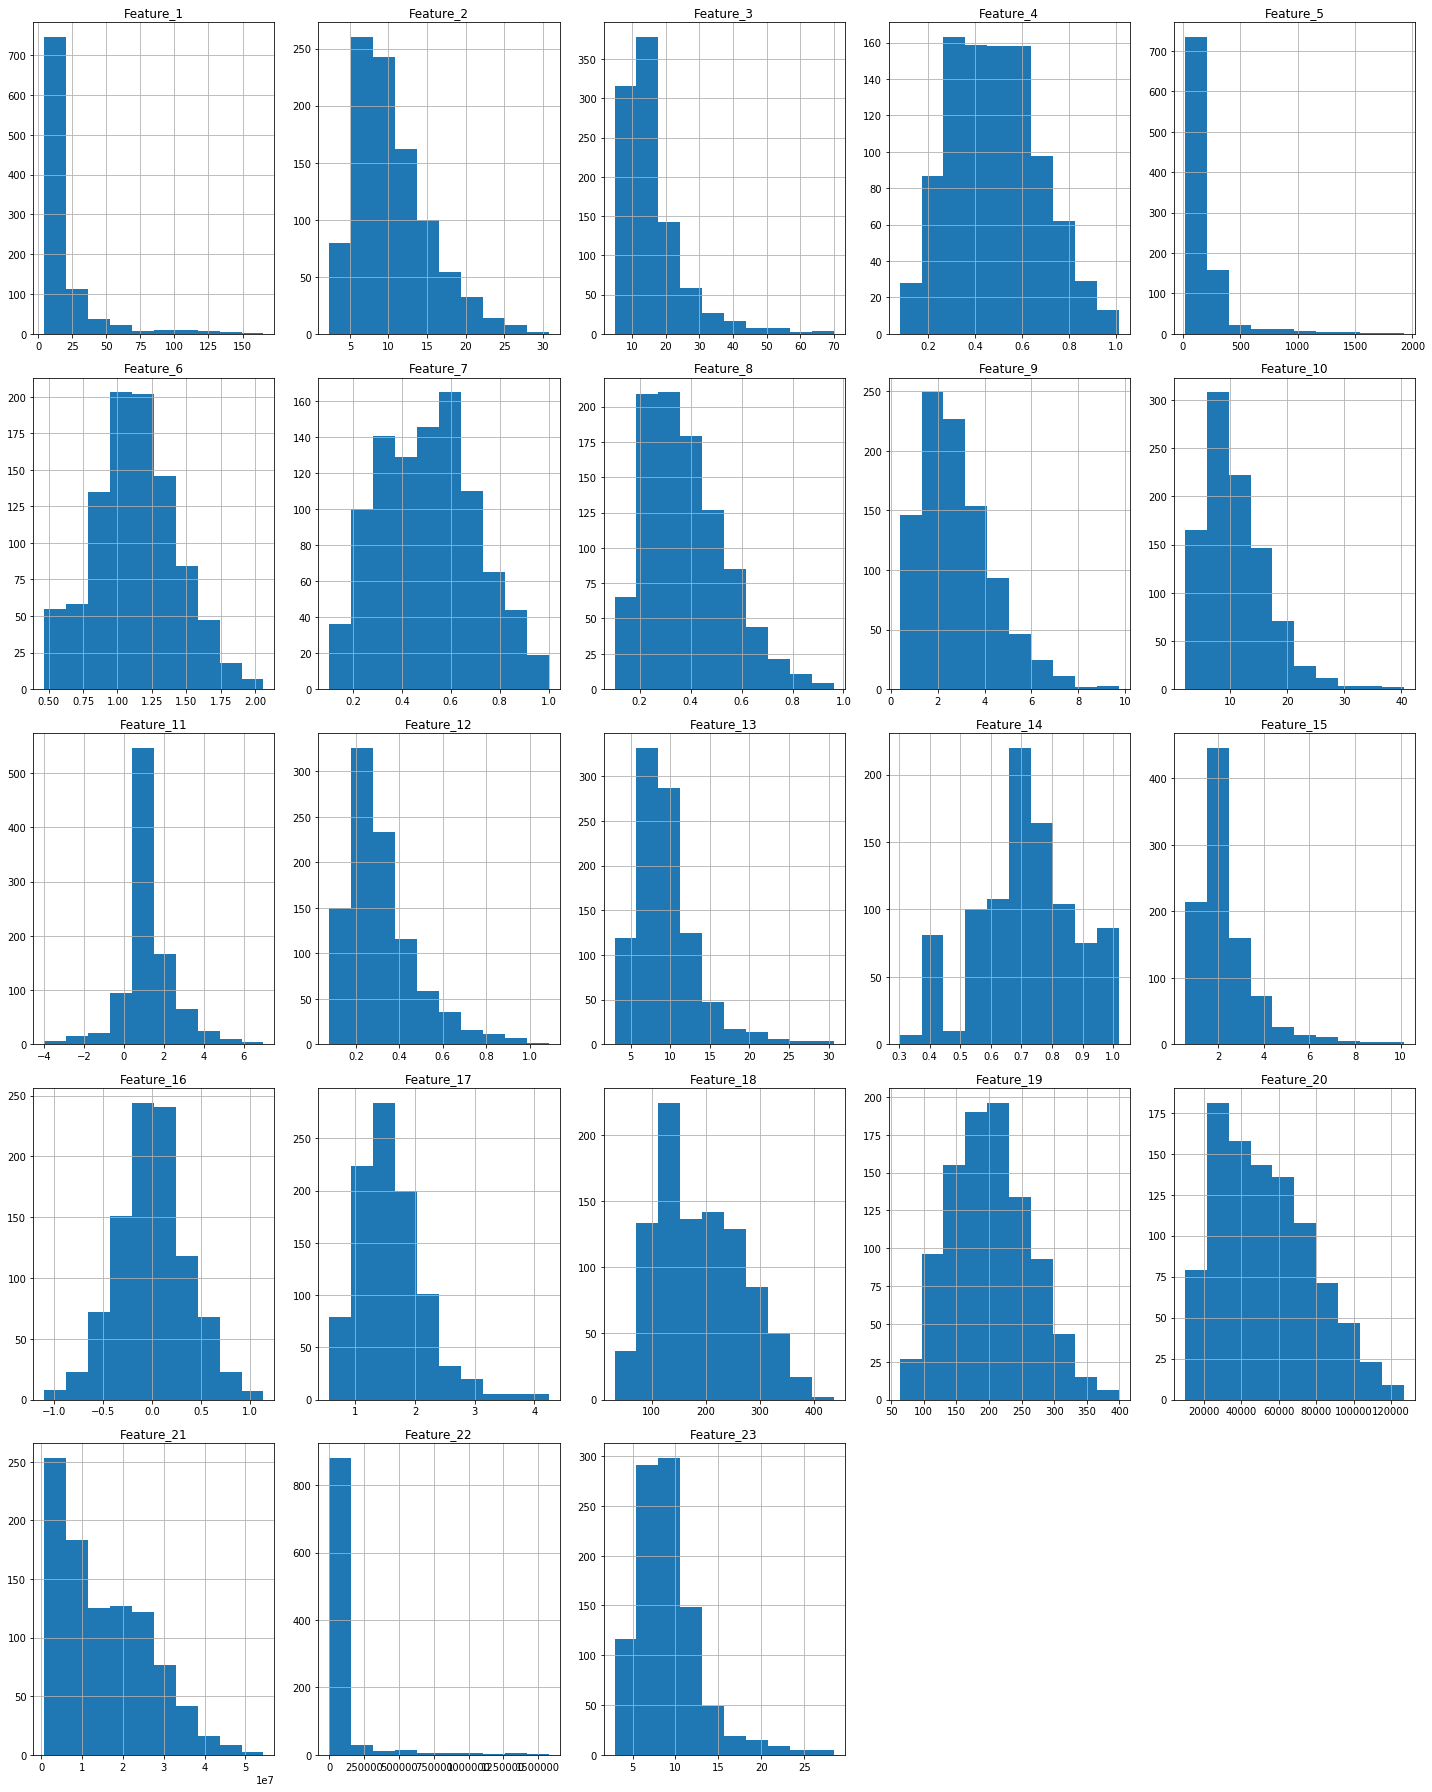

In [30]:
# Input Features
inp_data_dime.hist(figsize=(20, 25))
plt.tight_layout()
plt.show()

# for col in inp_data_dime.columns

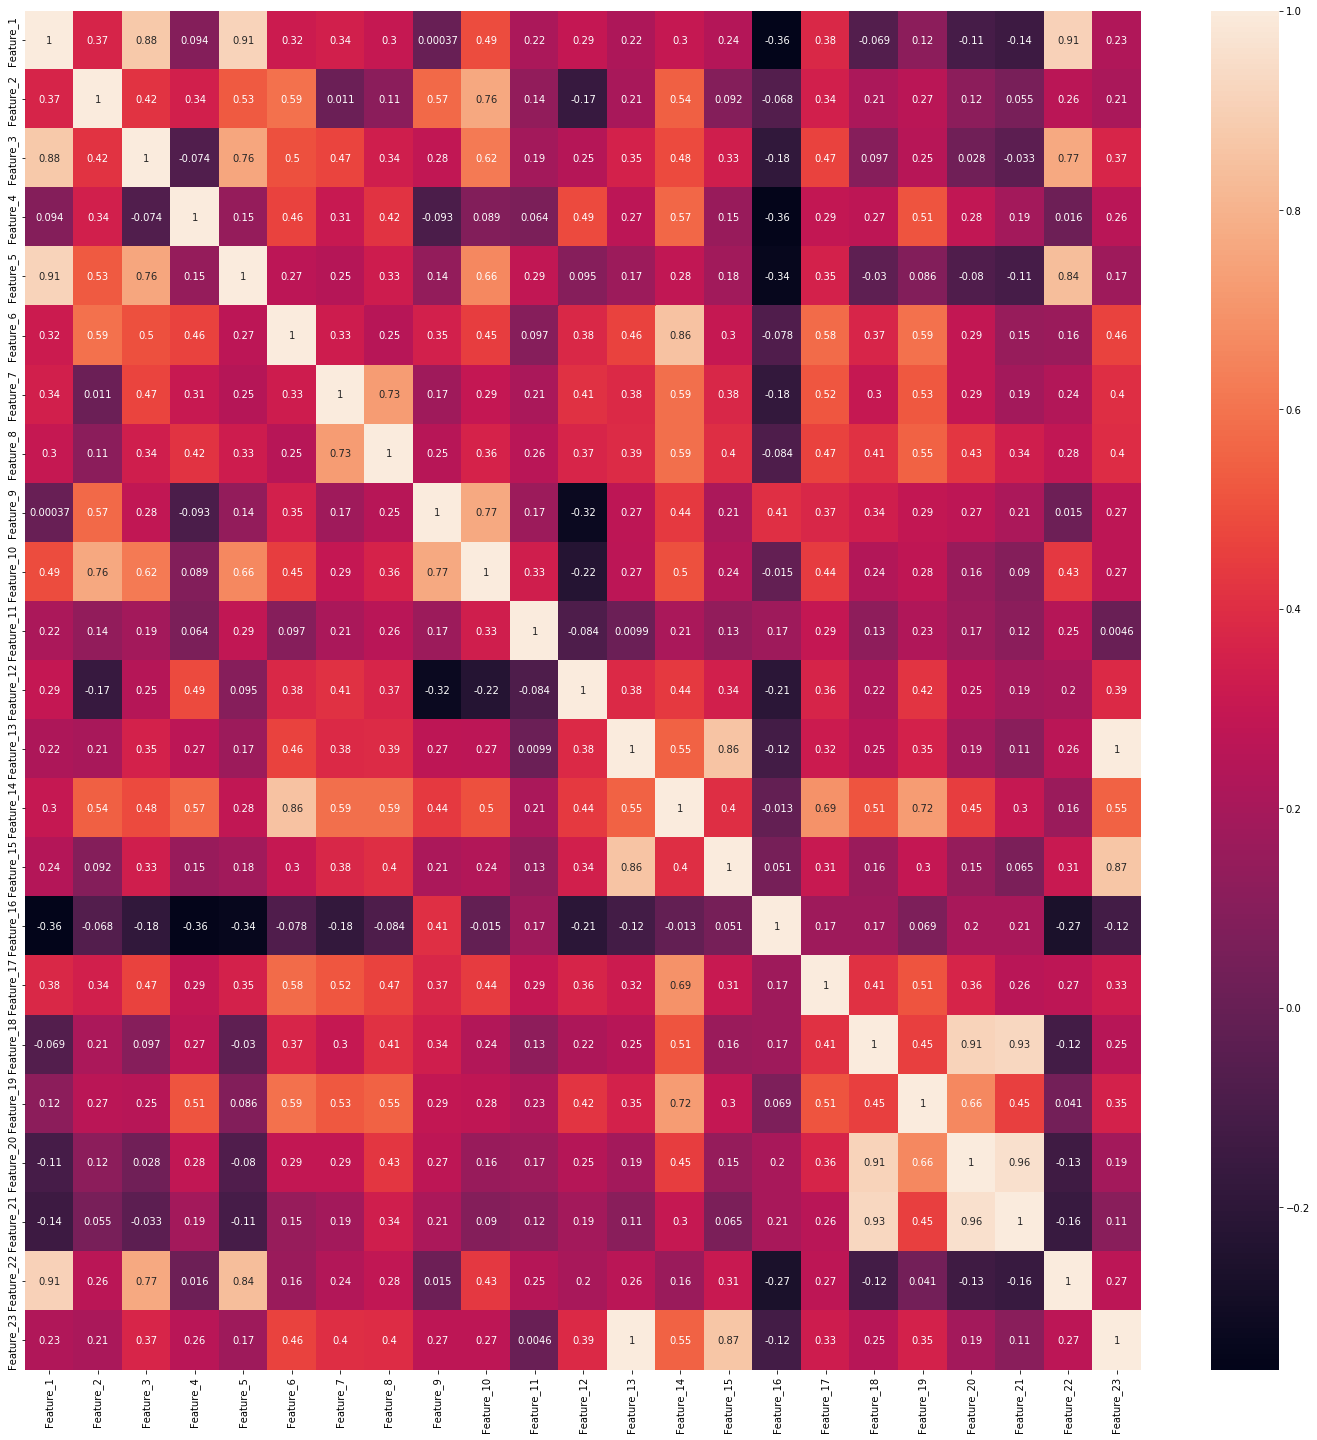

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(data_dime.corr(), annot=True)

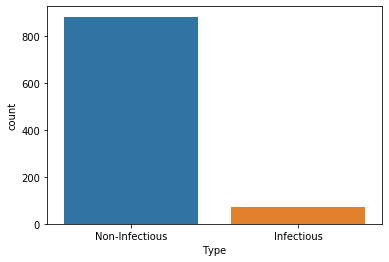

In [16]:
# Target Feature Type Analysis
sns.countplot(x=out_data_dime)

In [62]:
data_dime.is().sum() # No Missing Values

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Type          0
dtype: int64

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section B - 20 Marks </h1>

### 2.a. Use inp_data_dime. Apply PCA and compute all the possible principle components(PCs). How many PCs are required to reproduce the 95% charecteristics of original data. Plot it with appropriate diagram. Also print the top 5 eigen vectors (5 marks)

In [31]:
# Standard Scaler 
scaler = StandardScaler()
scaled_inp = scaler.fit_transform(inp_data_dime)

# PCA Analysis
pca = PCA(n_components=0.95)
pca.fit(scaled_inp)

reduced_data = pca.transform(scaled_inp)


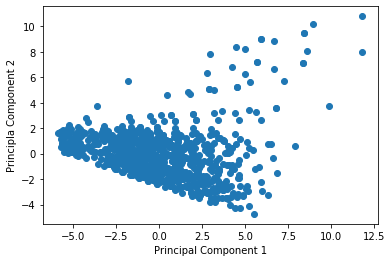

In [36]:
# Plotting first two components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principla Component 2")
plt.show()

In [37]:
# Top Eigen Vectors
print(pca.components_)

[[ 2.02168045e-01  1.93393754e-01  2.45480447e-01  1.67107748e-01
   1.97487042e-01  2.62332425e-01  2.34738886e-01  2.46179689e-01
   1.64049181e-01  2.33658952e-01  1.07856510e-01  1.58758766e-01
   2.34240782e-01  3.12555529e-01  2.07093063e-01 -3.35720749e-02
   2.58397797e-01  1.87761618e-01  2.46589534e-01  1.74404376e-01
   1.28991410e-01  1.70799068e-01  2.36720298e-01]
 [ 3.63074067e-01  1.08665358e-01  2.79248753e-01 -1.12359630e-01
   3.52872525e-01 -2.99395410e-02 -2.91598201e-02 -7.30578456e-02
  -5.93692292e-02  1.55291702e-01  3.06225856e-02 -6.88122436e-02
  -1.36496061e-02 -9.77906658e-02  1.07038033e-02 -1.99984719e-01
  -3.97756580e-02 -3.33064208e-01 -2.07359640e-01 -3.66297994e-01
  -3.61156269e-01  3.61589855e-01 -1.11046786e-02]
 [-2.70576314e-02  3.18776033e-01  5.67353013e-02 -2.04929717e-01
   9.96159864e-02  1.81801125e-02 -1.56431576e-01 -9.12771132e-02
   4.17168968e-01  3.65749322e-01  1.84794237e-01 -4.26576973e-01
  -2.38731252e-01  1.73632633e-04 -2.190

### 2.b. Create a random matrix (M) of size 20x8 and compute singular values, left singular matrix and right singular matrix using Singular Value Decomposition. Try to reproduce the M back using singluar values and vectors. (5 Marks)


In [53]:
M = np.random.rand(20, 8)

# SVD of M
U, Sigma, VT = np.linalg.svd(M)

# Reproduce M
sigma_matrix = np.zeros((20,8))
np.fill_diagonal(sigma_matrix, Sigma)
M_reconstruct = U @ sigma_matrix @ VT

# Verify M
result = np.allclose(M, M_reconstruct)
print("Actual M and Reconstructed M are equal: ", result)


Actual M and Reconstructed M are equal:  True


In [54]:
U.shape, sigma_matrix.shape, VT.shape, M.shape

((20, 20), (20, 8), (8, 8), (20, 8))

### 2.c. Apply SVD on inp_data_dime and compare the SVD transform data with PCA transformed data. Also compare the top 5 singular vectors with eigen vector. How many Singular vectors are required to reproduce the 95% charecteristics of original data.(5 Marks)

In [58]:
# Apply SVD 
svd = TruncatedSVD()
svd.fit_transform(scaled_inp)

explained_variance = svd.explained_variance_ratio_.cumsum()
n_95 = (explained_variance >= 0.95 ).argmax() + 1


svd = TruncatedSVD(n_components=n_95)
svd.fit_transform(scaled_inp)
n_svd_components = svd.components_

print("Number of SVD components for 95% variance: ", n_95)
print("Shape of Singular Vectors: ", n_svd_components.shape)

Number of SVD components for 95% variance:  1
Shape of Singular Vectors:  (1, 23)


In [59]:
print("Shape of PCA Components: ", pca.components_.shape)

Shape of PCA Components:  (10, 23)


### 2.d. Build the following ML model and compare its performace: (5 Marks)
    i. ML model with original inp_data_dime and out
    ii. ML model with inp_data_dime_pca and out
    iii. ML model with inp_data_dime_svd and out
    (Note: For pca and svd use the number of components which captures the 95 percent of variance)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label = LabelEncoder()
label.fit(out_data_dime)
encoded_out = label.transform(out_data_dime)
# Build Logistic Regression Model on Orinigal Data
X_train, X_test, Y_train, Y_test = train_test_split(inp_data_dime, encoded_out, test_size=0.2, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
accuracyl1 = accuracy_score(Y_test, Y_pred1)
print("Accuracy of LogisticRegression Model with Original Data: ", accuracyl1)

Accuracy of LogisticRegression Model with Original Data:  0.9581151832460733


In [106]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label = LabelEncoder()
label.fit(out_data_dime)
encoded_out = label.transform(out_data_dime)
# Build Logistic Regression Model on Orinigal Data
X_train, X_test, Y_train, Y_test = train_test_split(inp_data_dime, encoded_out, test_size=0.2, random_state=42)

model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
accuracyr1 = accuracy_score(Y_test, Y_pred1)
print("Accuracy of RandomForestClassfier Model with Original Data: ", accuracyr1)

Accuracy of RandomForestClassfier Model with Original Data:  0.9842931937172775


In [105]:
from sklearn.model_selection import train_test_split

pca = PCA(n_components=10)
pca_inp_dime = pca.fit_transform(inp_data_dime)


# Build Logistic Regression Model on PCA Data
test_size=0.2
X_train, X_test, Y_train, Y_test = train_test_split(pca_inp_dime, encoded_out, test_size=test_size, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
accuracyl2 = accuracy_score(Y_test, Y_pred1)
print("Accuracy of LogisticRegression Model with PCA Data: ", accuracyl2)

Accuracy of LogisticRegression Model with PCA Data:  0.8952879581151832


In [103]:
from sklearn.model_selection import train_test_split

pca = PCA(n_components=10)
pca_inp_dime = pca.fit_transform(inp_data_dime)


# Build Logistic Regression Model on PCA Data
test_size=0.2
X_train, X_test, Y_train, Y_test = train_test_split(pca_inp_dime, encoded_out, test_size=test_size, random_state=42)

model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
accuracyr2 = accuracy_score(Y_test, Y_pred1)
print("Accuracy of RandomForestClassifier Model with PCA Data: ", accuracyr2)

Accuracy of RandomForestClassifier Model with PCA Data:  1.0


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svd = TruncatedSVD(n_components=1) # we have got this components count from the previous Analysis
svd_inp_dime = svd.fit_transform(inp_data_dime)


# Build Logistic Regression Model on SVD Data
test_size=0.2
X_train, X_test, Y_train, Y_test = train_test_split(svd_inp_dime, encoded_out, test_size=test_size, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
accuracyl3 = accuracy_score(Y_test, Y_pred1)
print("Accuracy of LogisticRegression Model with SVD Data: ", accuracyl3)

Accuracy of LogisticRegression Model with SVD Data:  0.9162303664921466


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svd = TruncatedSVD(n_components=1) # we have got this components count from the previous Analysis
svd_inp_dime = svd.fit_transform(inp_data_dime)


# Build Logistic Regression Model on SVD Data
test_size=0.2
X_train, X_test, Y_train, Y_test = train_test_split(svd_inp_dime, encoded_out, test_size=test_size, random_state=42)

model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
accuracyr3 = accuracy_score(Y_test, Y_pred1)
print("Accuracy of RandomForestClassifier Model with SVD Data: ", accuracyr3)

Accuracy of RandomForestClassifier Model with SVD Data:  0.8743455497382199


In [111]:
print("LogisticRegression With Origina Data: ", accuracyl1)
print("LogisticRegression with PCA Data: ", accuracyl2)
print("LogisticRegression with SVD Data: ", accuracyl3)
print("RandomForestClassifier with Original Data: ", accuracyr1)
print("RandomForestClassfier with PCA Data: ", accuracyr2)
print("RandomForestClassifier with SVD Data: ", accuracyr3)

LogisticRegression With Origina Data:  0.9581151832460733
LogisticRegression with PCA Data:  0.8952879581151832
LogisticRegression with SVD Data:  0.9162303664921466
RandomForestClassifier with Original Data:  0.9842931937172775
RandomForestClassfier with PCA Data:  1.0
RandomForestClassifier with SVD Data:  0.8743455497382199


**Based on the Above Metrics we can conclude that  RandomForestClassfier with PCA is giving High Accuracy, bu there colud be chances the model is Overfitted due to the Data Set Size and Sample Size**

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section C - 15 Marks </h1>


### 3 (a) Build the popularity based recommendation system and suggest top 5 items. (5 Marks)

Use the dataset: data_recom


In [77]:
data_recom=data.iloc[:,24:28]
data_recom.head()

,UserID,ItemID,Rating,Timestamp
0,905,470,1,889325071
1,697,1518,5,879835275
2,855,1687,5,875638677
3,950,1447,5,877420720
4,806,1170,4,879889337


In [79]:
item_popularity = data_recom.groupby("ItemID")["Rating"].mean().sort_values(ascending=False)
print("Top 5 Popular Items")
item_popularity.head()

Top 5 Popular Items


ItemID
499    5.0
407    5.0
394    5.0
233    5.0
164    5.0
Name: Rating, dtype: float64


### 3 (b) Build collaborative recommendation engine to recommend a top 5 items to the specific user. Measure the model quality in terms of RMSE (10 Marks)
Use the dataset: data_recom

In [86]:
from surprise.model_selection import train_test_split
from surprise import SVD

# Reader Object
reader = Reader(rating_scale=(data_recom["Rating"].min(), data["Rating"].max()))
# Load the dataset  and Split for train and test
data_surprise = Dataset.load_from_df(data_recom[["UserID", "ItemID", "Rating"]], reader)

trainset, testset = train_test_split(data_surprise, test_size=0.2)
# Build Model with SVD

model = SVD()
model.fit(trainset)

predictions = model.test(testset)

# Evaluating the RMSE values
rmse = accuracy.rmse(predictions)

RMSE: 0.9376


In [88]:
# Predict for Specific User
items_rated_by_user = data_recom[data_recom["UserID"] == 855]["ItemID"].values
items = data_recom.ItemID.unique()

items_to_predict = [item for item in items if item not in items_rated_by_user]

predictions_for_user = [model.predict(855, item) for item in items_to_predict]



In [90]:
predictions_for_user

[Prediction(uid=855, iid=470, r_ui=None, est=2.353169453063357, details={'was_impossible': False}),
 Prediction(uid=855, iid=1447, r_ui=None, est=3.5855194547736144, details={'was_impossible': False}),
 Prediction(uid=855, iid=1170, r_ui=None, est=4.570904504255849, details={'was_impossible': False}),
 Prediction(uid=855, iid=1543, r_ui=None, est=3.991916134500383, details={'was_impossible': False}),
 Prediction(uid=855, iid=1512, r_ui=None, est=3.6824610334638908, details={'was_impossible': False}),
 Prediction(uid=855, iid=1622, r_ui=None, est=2.5322355847872364, details={'was_impossible': False}),
 Prediction(uid=855, iid=376, r_ui=None, est=3.3816911969646273, details={'was_impossible': False}),
 Prediction(uid=855, iid=1368, r_ui=None, est=3.188618844867892, details={'was_impossible': False}),
 Prediction(uid=855, iid=1627, r_ui=None, est=4.10340299575652, details={'was_impossible': False}),
 Prediction(uid=855, iid=1277, r_ui=None, est=3.952477693381508, details={'was_impossible'

In [92]:
predictions_for_user.sort(key=lambda x: x.est, reverse=True)
# Top 5 Items which can be recommended for user 855
items_ids = [prediction.iid  for prediction in predictions_for_user[:5]]

items_ids

[1531, 1292, 1415, 1678, 1170]